importing relevant Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings

In [6]:
warnings.filterwarnings('ignore')

Loading the Data

In [7]:
car_raw=pd.read_csv("1.04. Real-life example.csv")

In [8]:
car_raw.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


Preprocessing

In [9]:
car_raw.describe(include='all')
#for getting categorical column also

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [10]:
# car_raw.drop('Model',axis=1,inplace=True)


In [11]:
car_raw.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Checking Missing Values

In [12]:
car_raw.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [13]:
car_raw.dropna(axis=0,inplace=True)

EDA

Text(0.5, 1.0, 'Car Price Distribution')

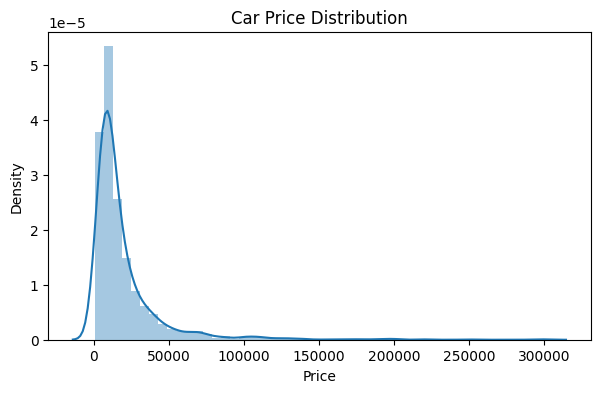

In [14]:
plt.figure(figsize=(7,4))
sns.distplot(car_raw['Price']);
plt.title('Car Price Distribution')

Dealing with outlier

In [15]:
q=car_raw['Price'].quantile(q=0.99)
q

129812.51999999981

In [16]:
car_1=car_raw[car_raw['Price']<q]
car_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


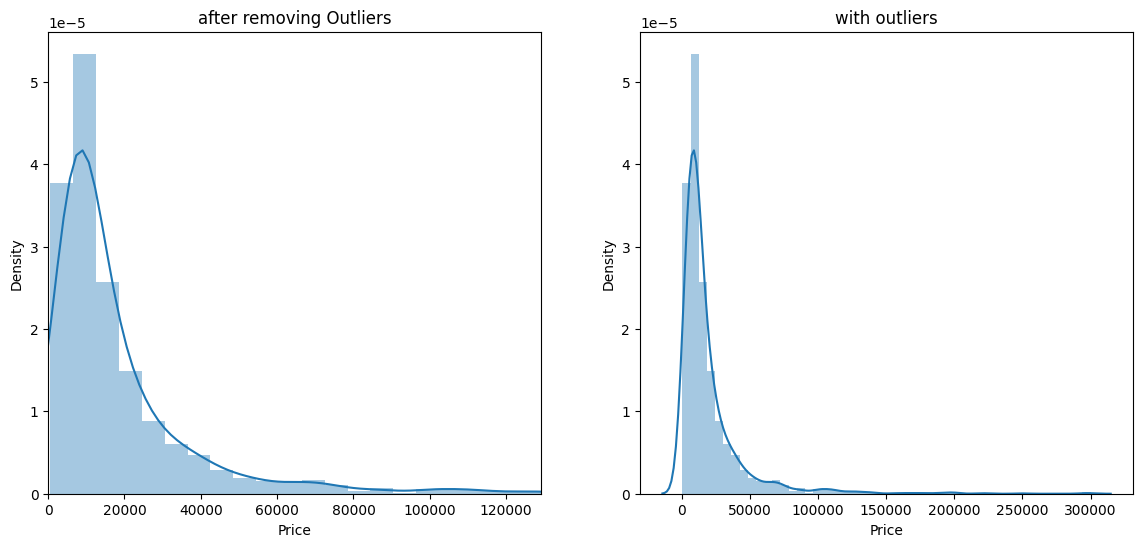

In [17]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(car_raw['Price']);
plt.title('after removing Outliers');
plt.xlim(0,129222)

plt.subplot(1,2,2)
sns.distplot(car_raw['Price'])
plt.title('with outliers');

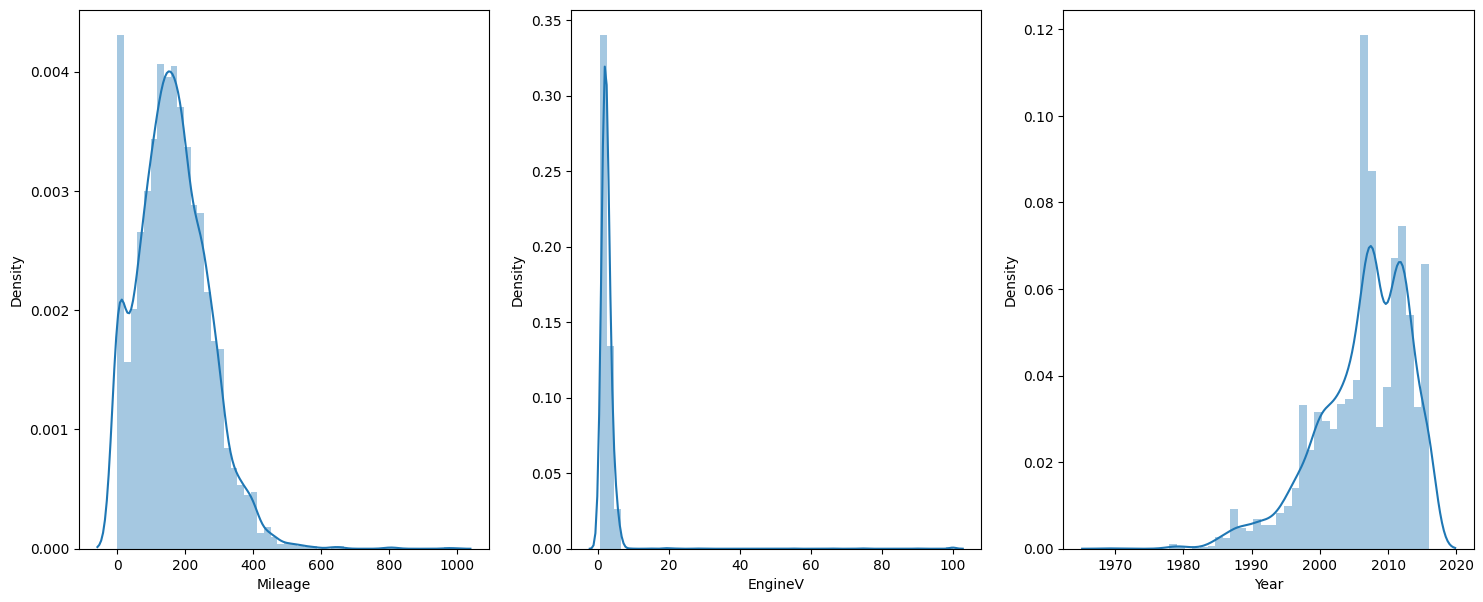

In [18]:
plt.figure(figsize=(18,7))

plt.subplot(1,3,1)
sns.distplot(car_1['Mileage']);

plt.subplot(1,3,2)
sns.distplot(car_raw['EngineV']);

plt.subplot(1,3,3)
sns.distplot(car_raw['Year']);

In [19]:
q=car_1['Mileage'].quantile(q=0.99)
car_2=car_1[car_1['Mileage']<q]

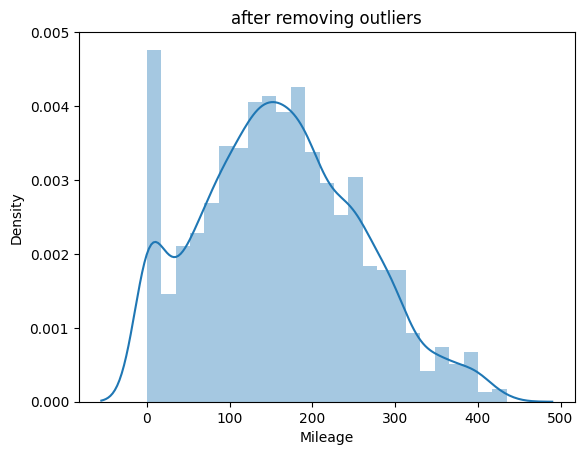

In [20]:
sns.distplot(car_2['Mileage']);
plt.title('after removing outliers');

The EngineV

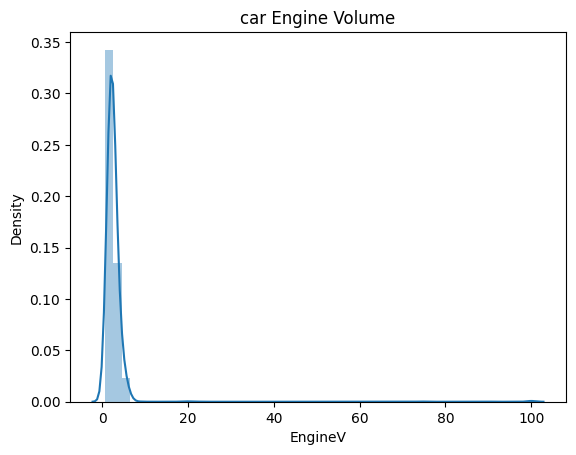

In [21]:
sns.distplot(car_2['EngineV']);
plt.title('car Engine Volume');

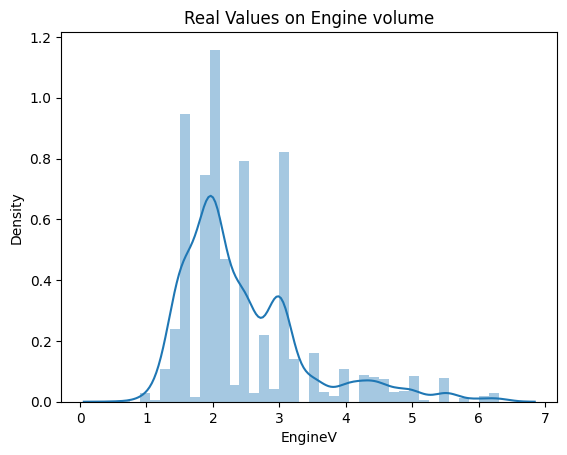

In [22]:
car_3=car_2[car_2['EngineV']<6.5]

sns.distplot(car_3['EngineV']);
plt.title('Real Values on Engine volume');

Year

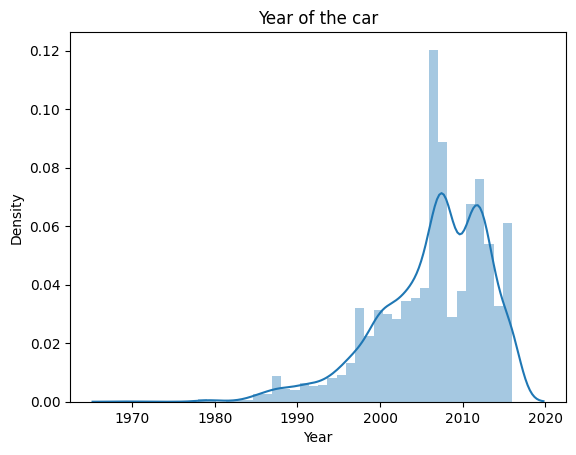

In [23]:
sns.distplot(car_3['Year']);
plt.title('Year of the car');

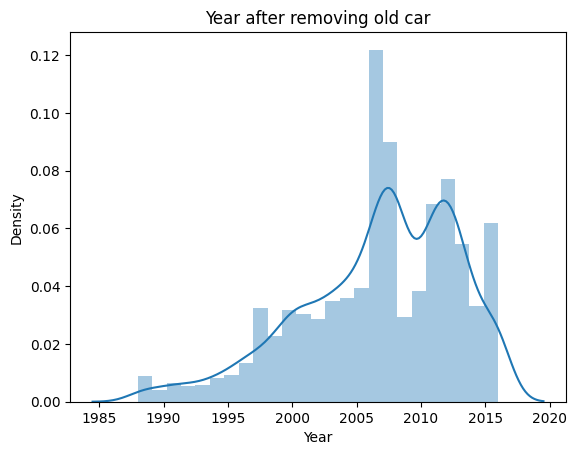

In [24]:
q=car_3['Year'].quantile(q=0.01)
car_4=car_3[car_3['Year']>q]

sns.distplot(car_4['Year']);
plt.title('Year after removing old car');


In [25]:
car_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


In [26]:
car_clean=car_4.reset_index(drop=True)

In [27]:
car_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


In [28]:
car_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


In [29]:
car_raw.shape[0] - car_clean.shape[0]

158

In [30]:
car_clean.to_csv('Car_cleaned.csv',index=False)
print('data saved ')

data saved 


In [31]:
car=pd.read_csv("Car_cleaned.csv")
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [32]:
# plt.figure(figsize=(16,4))

# plt.subplot(1,3,1)
# sns.scatterplot(x=car['Year'],y=car['Price']);
# plt.title('Year Vs Price');

# plt.subplot(1,3,2)
# sns.scatterplot(x=car['EngineV'],y=car['Price']);
# plt.title('EngineV Vs Price');

# plt.subplot(1,3,3)
# sns.scatterplot(x=car['Mileage'],y=car['Price']);
# plt.title('Mileage Vs Price');



In [33]:
# sns.distplot(car['Price'])
# plt.title('Price')

In [34]:
# log_price=np.log(car['Price'])

In [35]:
# car['log_price']=log_price

In [36]:
# car.head()

In [37]:
# plt.figure(figsize=(16,4))

# plt.subplot(1,3,1)
# sns.scatterplot(x=car['Year'],y=car['log_price']);
# plt.title('Year Vs log_price');

# plt.subplot(1,3,2)
# sns.scatterplot(x=car['EngineV'],y=car['log_price']);
# plt.title('EngineV Vs log_price');

# plt.subplot(1,3,3)
# sns.scatterplot(x=car['Mileage'],y=car['log_price']);
# plt.title('Mileage Vs log_price');

In [38]:
# car.drop('Price',axis=1,inplace=True)

In [39]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [40]:
# var= car[['Mileage','Year','EngineV']]

In [41]:
# vif_df=pd.DataFrame()

In [42]:
# vif_df['VIF']=[vif(var.values,i) for i in range(var.shape[1])]




In [43]:
# vif_df['features']=var.columns
# vif_df

In [44]:
# car.drop('Year',axis=1,inplace=True)
# car.head()

In [45]:
# car.info()

In [46]:
# car_dum = pd.get_dummies(car, drop_first=True, dtype=int)
# car_dum

In [47]:
# vif_df_all=pd.DataFrame()
# vif_df_all['VIF']=[vif(car_dum.values, i) for i in range(car_dum.shape[1])]
# vif_df_all['features']=car_dum.columns
# vif_df_all

In [48]:
# vif_df_all['VIF']=[vif(car_dum.values,i) for i in range(car_dum.shape[1])]

In [49]:
# vif_df_all['features']=car_dum.columns

In [50]:
# vif_df_all

In [51]:
# car_dum.columns

In [52]:
# col=['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
#        'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
#        'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
#        'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
#        'Registration_yes']
# car_pos=car_dum[col]
# car_pos

In [53]:
# car_pos.to_csv('Car_preprocessed.csv',index=False)
# print('Data Saved')

In [54]:
# car=pd.read_csv("Car_preprocessed.csv")
# car.head()

Linear Regression


In [55]:
# x=car.drop('log_price',axis=1)
# y=car['log_price']

In [56]:
# x.shape,y.shape

Scalling the data

In [57]:
# from sklearn.preprocessing import StandardScaler

In [58]:
# scaler=StandardScaler()

In [59]:
# x_scaled=scaler.fit_transform(x)

In [60]:
# x_scaled

In [61]:
# x_scaled[0]

train_test_split

In [62]:
# from sklearn.model_selection import train_test_split

In [63]:
# X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=32)
# X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [64]:
# from sklearn.linear_model import LinearRegression
# reg=LinearRegression()
# reg.fit(X_train,y_train)

In [65]:
# y_pred_train=reg.predict(X_train)
# plt.figure(figsize=(10,6))
# plt.scatter(y_train,y_pred_train,alpha=0.2)
# plt.xlabel('Targets (y_train)');
# plt.ylabel('Predictions (y_pred)');
# plt.xlim(6,13);
# plt.ylim(6,13);

In [66]:
# residual_train=(y_train - y_pred_train)

# plt.figure(figsize=(10,6))
# sns.distplot(residual_train);
# plt.title('Training Residual PDF');

In [67]:
# from sklearn.metrics import r2_score

In [68]:
# r2_score(y_train,y_pred_train)

In [69]:
# from sklearn.metrics import mean_squared_error
# np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train)))

bias and weight

In [70]:
# reg_summary=pd.DataFrame(x.columns.values,columns=['Features'])
# reg_summary['weights']=reg.coef_
# reg_summary

Evaluate on Testing data

In [71]:
# y_pred=reg.predict(X_test)

# plt.figure(figsize=(10,6))
# plt.scatter(y_test,y_pred,alpha=0.2)
# plt.xlabel('Targets (y_test)');
# plt.ylabel('Predictions (y_pred)');

In [72]:
# np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred)))

In [73]:
# df_eval=pd.DataFrame(np.exp(y_pred),columns=['Prediction'])

# y_test=y_test.reset_index(drop=True)
# df_eval['Tareget']=np.exp(y_test)
# df_eval

In [74]:
# df_eval['Residual']=df_eval['Tareget'] -df_eval['Prediction']
# df_eval['Difference%']=np.absolute(df_eval['Residual']/ df_eval['Tareget']*100)
# df_eval

In [75]:
# df_eval.describe()

In [76]:
# pd.options.display.max_rows=999
# pd.set_option('display.float_format', lambda x: '%2f' % x)
# df_eval.sort_values(by=['Difference%'])

In [77]:
brand_dic=dict()
body_dic=dict()
engine_type_dic=dict()
registration_dic=dict()
model_dic=dict()

In [78]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
 

car['brand_enc']=le.fit_transform(car['Brand'])
for num,lbl in enumerate(le.classes_):
    brand_dic[lbl]=num
print('Brand Label saved')

car['body_enc']=le.fit_transform(car['Body'])
for num,lbl in enumerate(le.classes_):
    body_dic[lbl]=num
print('Body Label saved')

car['engine_type_enc']=le.fit_transform(car['Engine Type'])
for num,lbl in enumerate(le.classes_):
    engine_type_dic[lbl]=num
print('Engine type Label saved')  

car['regis_enc']=le.fit_transform(car['Registration'])
for num,lbl in enumerate(le.classes_):
    registration_dic[lbl]=num
print('Registration Label saved')  

car['model_enc']=le.fit_transform(car['Model'])
for num,lbl in enumerate(le.classes_):
    model_dic[lbl]=num
print('Model Label saved')  

car_2=car.drop(['Brand','Body','Engine Type','Registration','Model'],axis=1)

car_2.head()

Brand Label saved
Body Label saved
Engine type Label saved
Registration Label saved
Model Label saved


,Price,Mileage,EngineV,Year,brand_enc,body_enc,engine_type_enc,regis_enc,model_enc
0,4200.0,277,2.0,1991,1,3,3,1,17
1,7900.0,427,2.9,1999,2,5,0,1,248
2,13300.0,358,5.0,2003,2,3,1,1,222
3,23000.0,240,4.2,2007,0,0,3,1,211
4,18300.0,120,2.0,2011,5,0,3,1,214


In [79]:
x=car_2.drop('Price',axis=1)
y=car_2['Price']

x.shape ,y.shape

((3867, 8), (3867,))

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3093, 8), (3093,), (774, 8), (774,))

In [82]:
from sklearn.ensemble import RandomForestRegressor

rf_1=RandomForestRegressor()

rf_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [83]:
rf_1.fit(X_train,y_train)

RandomForestRegressor()

In [84]:
y_pred_train=rf_1.predict(X_train)

from sklearn.metrics import mean_squared_error

rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))

print('RMSE on Training data {}'.format(rmse_train))

RMSE on Training data 2002.8236162010692


In [85]:
y_pred_test=rf_1.predict(X_test)

rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))


RMSE on Testing data 4973.540224530426


In [86]:
from sklearn.metrics import r2_score
y_pred_train=rf_1.predict(X_train)

print('Training Score: {}'.format(r2_score(y_train,y_pred_train)))

Training Score: 0.9886650588349061


In [87]:
y_pred_test=rf_1.predict(X_test)

print('Testing Score: {}'.format(r2_score(y_test,y_pred_test)))

Testing Score: 0.938934936181715


Text(0.5, 1.0, 'Testing Time')

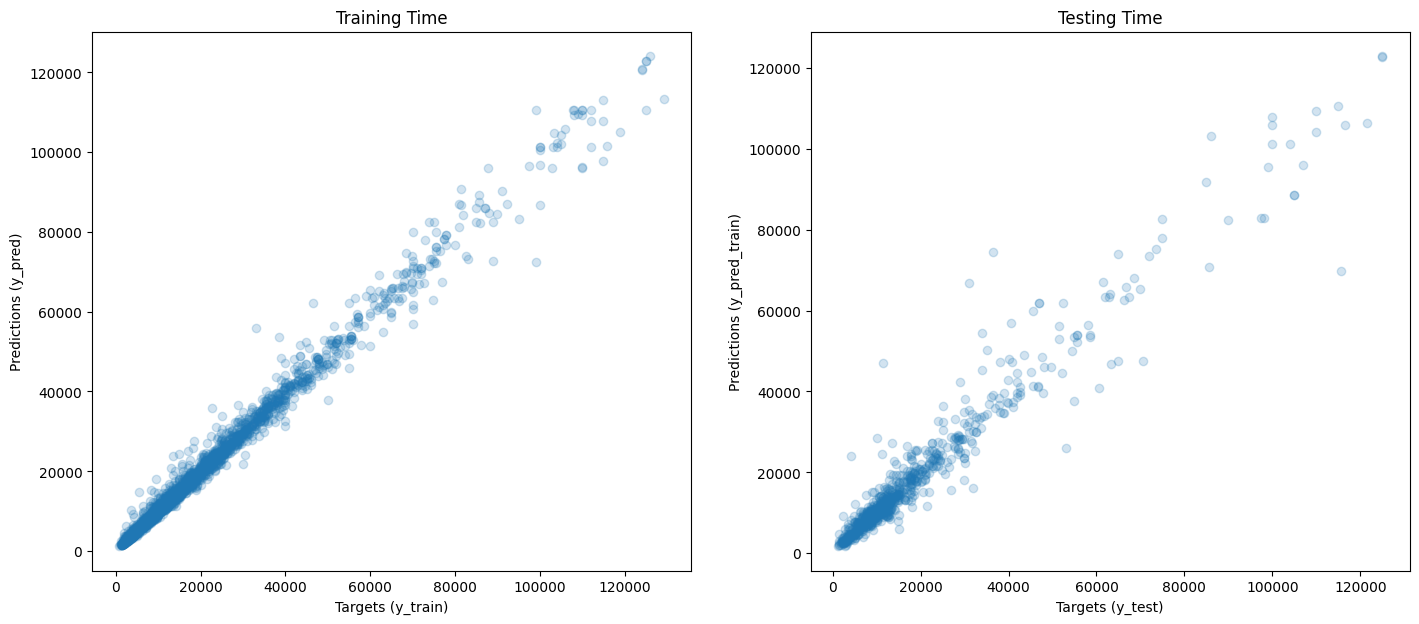

In [88]:

plt.figure(figsize=(17,7))
y_pred_train=rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train,y_pred_train,alpha=0.2)
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Training Time')



y_pred_test=rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test,alpha=0.2)
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time')

Text(0.5, 1.0, 'Testing Residual pdf')

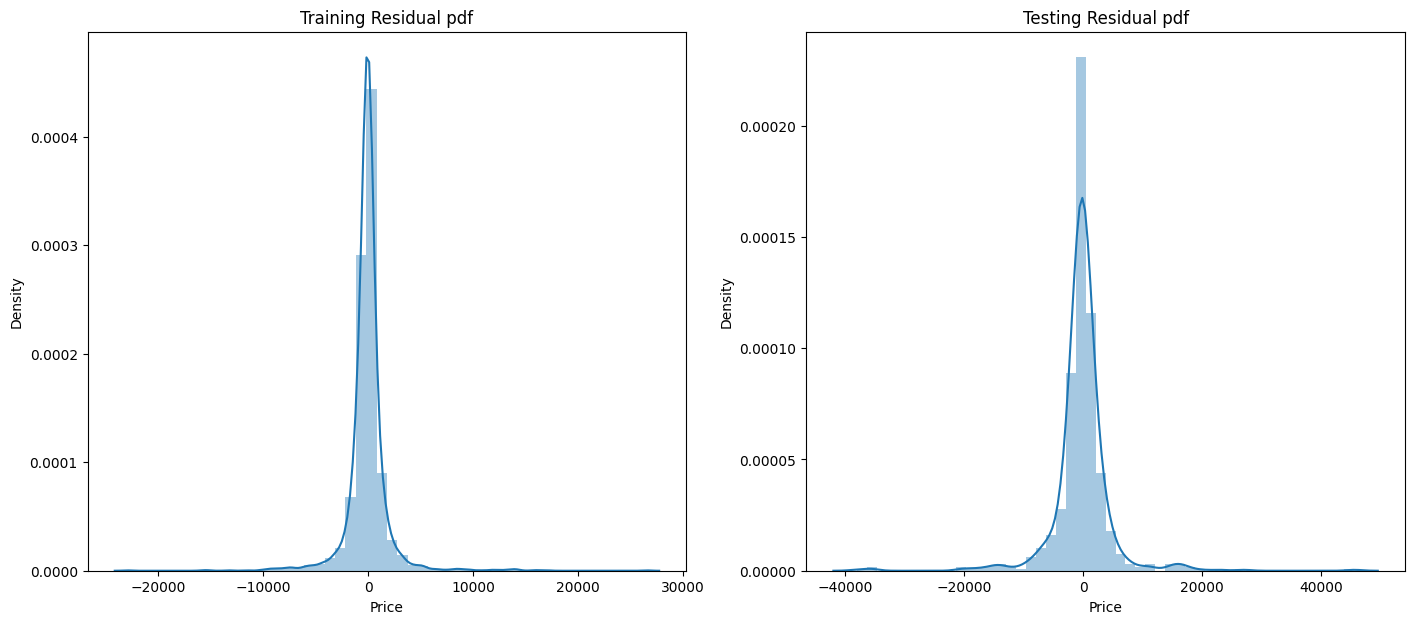

In [89]:
residual_train=(y_train -rf_1.predict(X_train))
residual_test=(y_test -rf_1.predict(X_test))

plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train)
plt.title('Training Residual pdf')

plt.subplot(1,2,2)
sns.distplot(residual_test)
plt.title('Testing Residual pdf')

In [90]:
df_eval=pd.DataFrame(rf_1.predict(X_test),columns=['Prediction'])
y_test=y_test.reset_index(drop=True)
df_eval['Tareget']=y_test
df_eval['Residual']=df_eval['Tareget']-df_eval['Prediction']
df_eval['Difference%']=np.absolute(df_eval['Residual']/df_eval['Tareget']*100)
df_eval

,Prediction,Tareget,Residual,Difference%
0,17885.110000,19000.0,1114.890000,5.867842
1,5887.780000,5500.0,-387.780000,7.050545
2,25419.450000,19200.0,-6219.450000,32.392969
3,12581.170000,11900.0,-681.170000,5.724118
4,8372.240000,7750.0,-622.240000,8.028903
...,...,...,...,...
769,105839.100000,116500.0,10660.900000,9.150987
770,10967.888333,13200.0,2232.111667,16.909937
771,28167.766190,27500.0,-667.766190,2.428241
772,15763.340000,16500.0,736.660000,4.464606


In [91]:
df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,18825.974430,18602.017829,-223.956600,17.257210
std,19447.548517,20139.559184,4971.708062,29.721716
min,1748.570000,1200.000000,-38078.212283,0.009804
25%,7840.492500,7500.000000,-1396.577500,3.894895
50%,11871.750000,11900.000000,-164.980000,10.053439
75%,21788.550000,20999.060000,1028.242500,21.103301
max,122987.000000,125000.000000,45630.615000,486.091707


In [92]:
from sklearn.model_selection import RandomizedSearchCV

rf_random=RandomForestRegressor()

random_grid={'bootstrap':[True,False],
             'max_depth':[10,20,30,40,50,None],
             'max_features':['auto','sqrt'],
             'min_samples_leaf':[1,2,4],
             'min_samples_split':[2,5,7],
             'n_estimators':[100,200]}


rf_random=RandomizedSearchCV(estimator=rf_random,param_distributions=random_grid,n_iter=100,cv=3,verbose=8,n_jobs=-1)
rf_random.fit(X_train,y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 200]},
                   verbose=8)

In [93]:
rf_random.best_estimator_,rf_random.best_params_,rf_random.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                       n_estimators=200),
 {'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 30,
  'bootstrap': False},
 0.9276543180762292)

In [94]:
np.sqrt(mean_squared_error(y_train,rf_random.predict(X_train)))

630.1711324365705

In [95]:
np.sqrt(mean_squared_error(y_test,rf_random.predict(X_test)))

4166.305505853375

In [96]:
from sklearn.model_selection import GridSearchCV
rf_grid_model=RandomForestRegressor()
param_grid={'bootstrap':[False],
             'max_depth':[25,30,35],
             'max_features':['sqrt'],
             'min_samples_leaf':[1,2],
             'min_samples_split':[1,2,3],
             'n_estimators':[100,150,200]}

rf_grid =GridSearchCV(estimator=rf_grid_model,
                      param_grid=param_grid,
                      cv=3,
                      n_jobs=-1,
                      verbose=8)
rf_grid.fit(X_train,y_train)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [25, 30, 35],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]},
             verbose=8)

In [97]:
rf_grid.best_estimator_,rf_grid.best_params_,rf_grid.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=25, max_features='sqrt'),
 {'bootstrap': False,
  'max_depth': 25,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.9283554088306705)

In [98]:
np.sqrt(mean_squared_error(y_train,rf_grid.predict(X_train)))

630.1816780154959

In [99]:
np.sqrt(mean_squared_error(y_test,rf_grid.predict(X_test)))

4106.7815134373595

In [100]:
rf_grid_model_2=RandomForestRegressor()
param_grid_2={'bootstrap':[False],
             'max_depth':[28,30,32],
             'max_features':['sqrt'],
             'min_samples_leaf':[1],
             'min_samples_split':[2,3,4],
             'n_estimators':[50,80,100]}

rf_grid_2 =GridSearchCV(estimator=rf_grid_model_2,
                      param_grid=param_grid_2,
                      cv=3,
                      n_jobs=-1,
                      verbose=8)
rf_grid_2.fit(X_train,y_train)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [28, 30, 32],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             verbose=8)

In [101]:
rf_grid_2.best_estimator_,rf_grid_2.best_params_,rf_grid_2.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                       n_estimators=80),
 {'bootstrap': False,
  'max_depth': 30,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 80},
 0.92710938221428)

In [102]:
np.sqrt(mean_squared_error(y_train,rf_grid_2.predict(X_train)))

630.2876196112773

In [103]:
np.sqrt(mean_squared_error(y_test,rf_grid_2.predict(X_test)))

4054.569259518845

Text(0.5, 1.0, 'Testing Time')

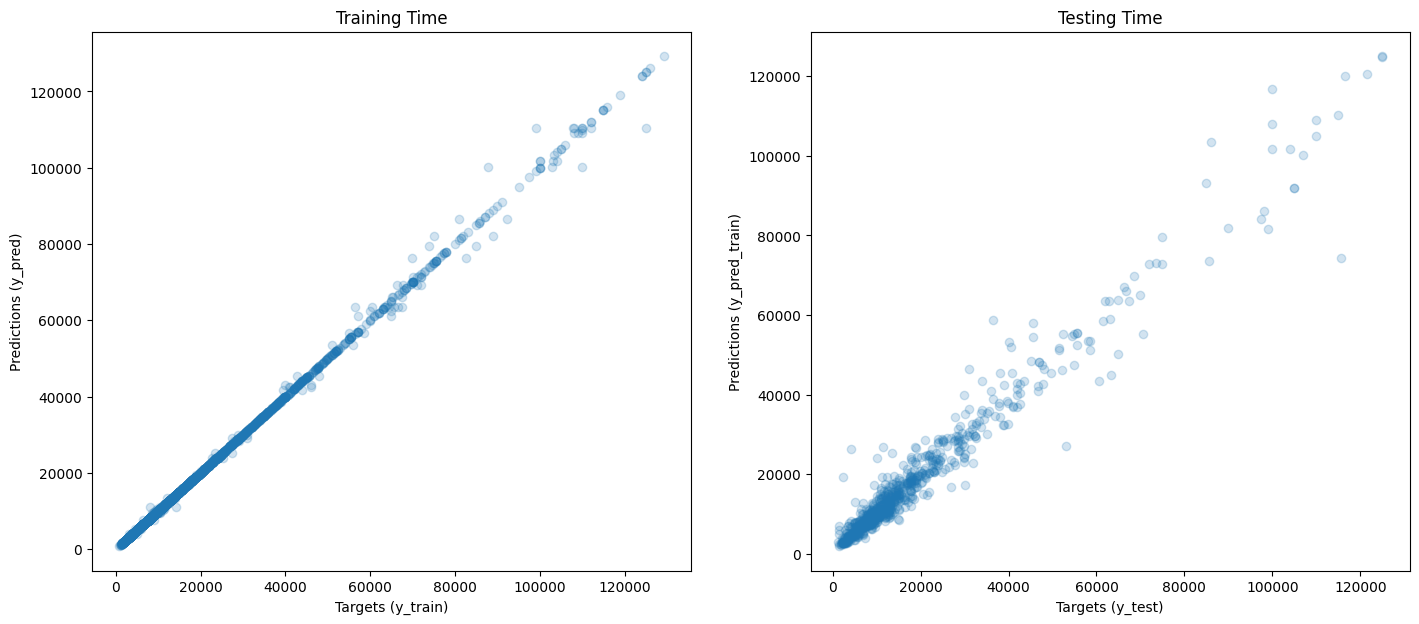

In [104]:
plt.figure(figsize=(17,7))
y_pred_train=rf_grid_2.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train,y_pred_train,alpha=0.2)
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Training Time')



y_pred_test=rf_grid_2.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test,alpha=0.2)
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time')

In [105]:
from sklearn.metrics import r2_score

print(f'Training r2_score:{r2_score(y_train,rf_grid_2.predict(X_train))}')
print(f'Testting r2_score:{r2_score(y_test,rf_grid_2.predict(X_test))}')

Training r2_score:0.9988774352104157
Testting r2_score:0.9594163604032937


Text(0.5, 1.0, 'Testing Residual pdf')

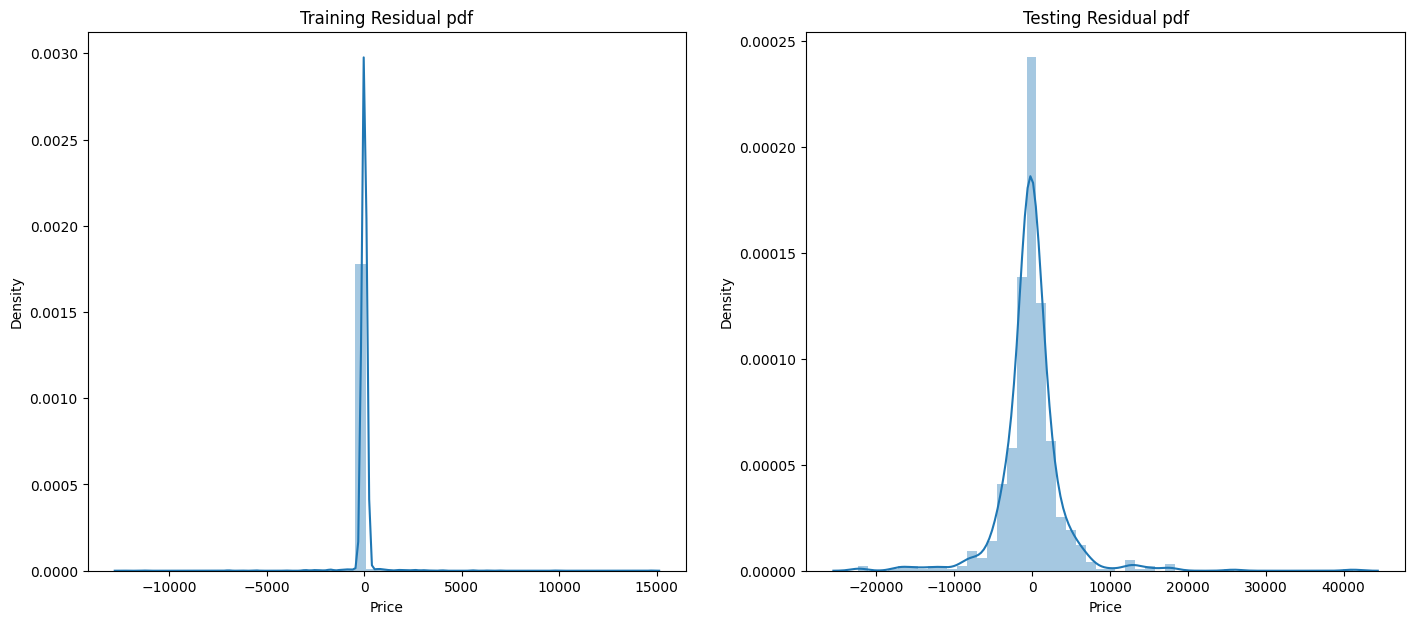

In [106]:
residual_train=(y_train -rf_grid_2.predict(X_train))
residual_test=(y_test -rf_grid_2.predict(X_test))

plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train)
plt.title('Training Residual pdf')

plt.subplot(1,2,2)
sns.distplot(residual_test)
plt.title('Testing Residual pdf')

In [107]:
df_eval=pd.DataFrame(rf_grid_2.predict(X_test),columns=['Prediction'])
y_test=y_test.reset_index(drop=True)
df_eval['Tareget']=y_test
df_eval['Residual']=df_eval['Tareget']-df_eval['Prediction']
df_eval['Difference%']=np.absolute(df_eval['Residual']/df_eval['Tareget']*100)
df_eval

,Prediction,Tareget,Residual,Difference%
0,18645.800000,19000.0,354.200000,1.864211
1,5073.125000,5500.0,426.875000,7.761364
2,24387.681250,19200.0,-5187.681250,27.019173
3,11970.400000,11900.0,-70.400000,0.591597
4,9026.812500,7750.0,-1276.812500,16.475000
...,...,...,...,...
769,120043.750000,116500.0,-3543.750000,3.041845
770,11198.937500,13200.0,2001.062500,15.159564
771,28266.666667,27500.0,-766.666667,2.787879
772,13808.550000,16500.0,2691.450000,16.311818


In [108]:
df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,18700.390030,18602.017829,-98.372200,17.860714
std,19382.067617,20139.559184,4055.996728,40.170907
min,1931.420833,1200.000000,-22288.137500,0.000000
25%,7801.359375,7500.000000,-1302.500000,4.465799
50%,11836.362500,11900.000000,-166.718750,10.205446
75%,21419.687500,20999.060000,1048.793469,19.889172
max,125000.000000,125000.000000,41163.900000,706.897396


In [109]:
import joblib

joblib.dump(rf_1,'rf1_base_rf.pkl',compress=3)

['rf1_base_rf.pkl']